In [1]:
# Disable jedi autocompleter due to bug in my local version (comment it out if it's not a problem)
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

In [3]:
# 1.Preprocessing the data frames due to format and column name inconstencies

all_files = os.listdir('./data/')
file_names = [file for file in all_files if file.endswith('.csv')]
all_dfs = []
cols_to_drop = ['Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval', 
                'Region', 'Dystopia Residual', 'Whisker high','Whisker low']
synonymous_cols = {'Perceptions of corruption' : 'Trust (Government Corruption)', 'Social support' : 'Family', 'Score' : 'Happiness Score', 
                    'Rank' : 'Happiness Rank', 'Country or region' : 'Country', 'Health  Life Expectancy ' : 'Health (Life Expectancy)',
                    'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom', 'Overall rank' : 'Happiness Rank',
                    'Economy  GDP per Capita ' : 'Economy (GDP per Capita)', 'GDP per capita' : 'Economy (GDP per Capita)', 'Trust  Government Corruption ': 'Trust (Government Corruption)'}


def preprocess_data_frames(file_names : list):
    for each_file in file_names:
        #if each_file != '2019.csv':
        df = pd.read_csv('./data/'+each_file)
        year = each_file.split('.')[0]
        df['Year'] =  year
        df['Train'] = 1 if year != '2019' else 0
        cols = df.columns
        new_cols = [col.replace('.', ' ', 10) for col in cols]
        df.columns = new_cols
        df.drop(cols_to_drop, errors='ignore', inplace=True, axis=1)
        new_cols = [synonymous_cols[col] if col in synonymous_cols.keys() else col for col in df.columns]
        df.columns = new_cols
        #print(year, '\n', cols, '\n', df.columns, len(df.columns))
        all_dfs.append(df)
        
    df = pd.concat(all_dfs, axis=0)
    
    # set the year column as index
    
    print("Concatenated data frame shape: " ,df.shape)
    print("Columns in data frame: ", df.columns)
    return df

df = preprocess_data_frames(file_names)

Concatenated data frame shape:  (782, 11)
Columns in data frame:  Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Train'],
      dtype='object')


In [3]:
df.head(5)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Train
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1


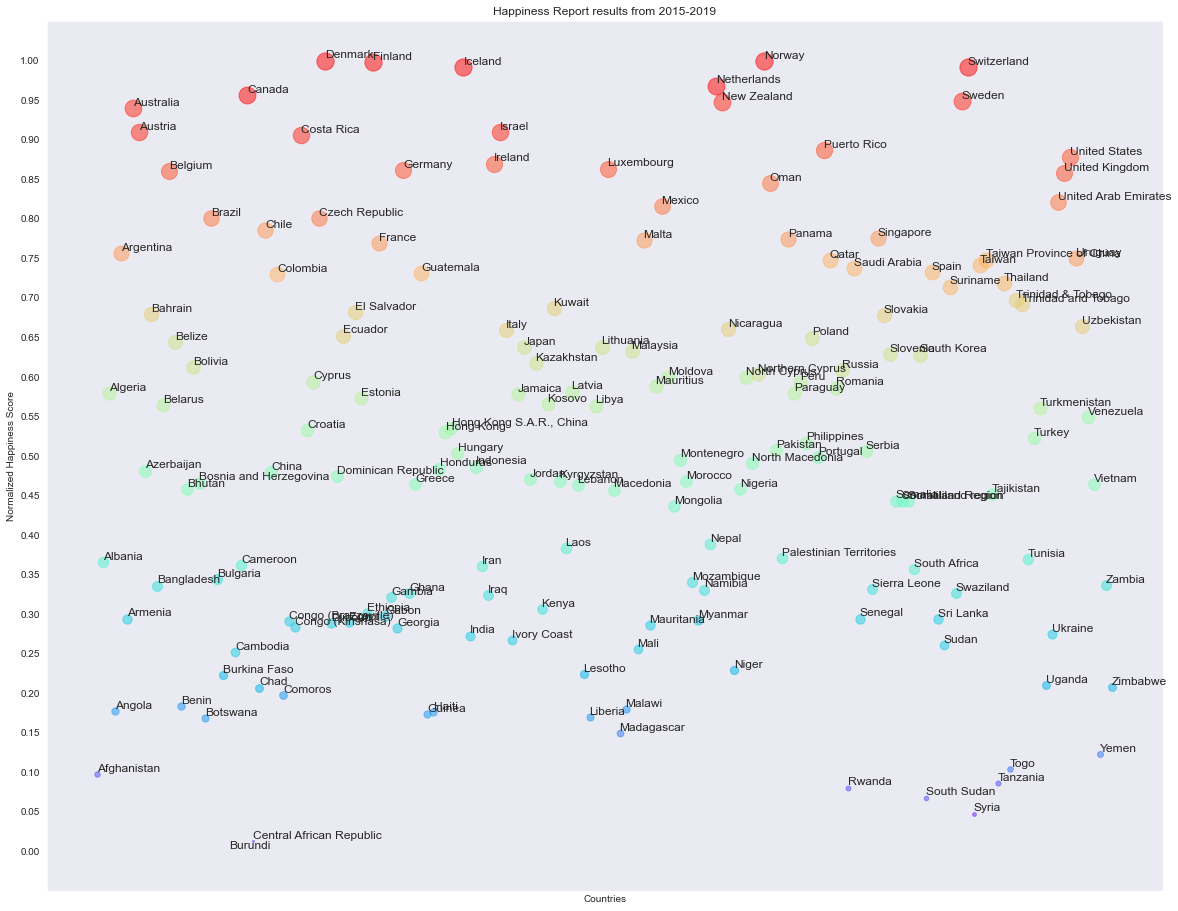

In [4]:
# 2.To prepare mean happiness dataframe from 2015 to 2019
mean_df = df.groupby(['Country'])[['Happiness Score']].mean().reset_index()
min_score = mean_df['Happiness Score'].min()
max_score = mean_df['Happiness Score'].max()
mean_df['score_norm'] = (mean_df['Happiness Score'] - min_score) / (max_score - min_score)

# 3.Plotting the happiness landscape based on the color code from botton to top
all_countries = mean_df['Country'].unique()
#colors = cm.rainbow(np.linspace(0, 1, len(all_countries)))
colors = cm.rainbow(np.arange(0, 1+0.05, 0.05))
custom_bins = np.arange(0, 1+0.05, 0.05)
plt.figure(figsize=(20, 16))
for i in range(0, len(all_countries)):
    obj = mean_df.iloc[i]
    score, country = obj['score_norm'], obj['Country']
    color_index = np.argwhere(score <= custom_bins)[0][0]
    plt.scatter(i, score, s=300*score, color=colors[color_index], alpha=0.5)
    plt.text(i+.003, score+.003, country, fontsize=12)
plt.yticks(np.arange(0, 1+0.05, 0.05))
plt.xticks([])
plt.xlabel('Countries')
plt.ylabel('Normalized Happiness Score')
plt.title('Happiness Report results from 2015-2019')
plt.savefig('./plots/Report_results.png', bbox_inches='tight')

In [5]:
columns = df.columns
cols_to_investigate = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score']

In [6]:
df_mean = df.groupby(['Country'])[cols_to_investigate].mean().reset_index()
for col in cols_to_investigate:
    min_score = df_mean[col].min()
    max_score = df_mean[col].max()
    df_mean[col] = (df_mean[col] - min_score) / (max_score - min_score)
df_mean.head()

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Afghanistan,0.202213,0.274484,0.218696,0.143967,0.119622,0.370032,0.097112
1,Albania,0.536798,0.505710,0.756155,0.548027,0.088058,0.232037,0.365704
2,Algeria,0.579565,0.719585,0.632488,0.240241,0.306149,0.095669,0.579494
3,Angola,0.456102,0.628591,0.096878,0.000000,0.148186,0.145493,0.177580
4,Argentina,0.635993,0.891579,0.729130,0.722589,0.132794,0.127667,0.756750


In [7]:
#Q1. What are the happiest countries in the world?
# I decided the threshold of 0.8 might be a decent cutoff
happy_countries = df_mean[df_mean['Happiness Score'] >= 0.8].reset_index()
print(happy_countries['Country'].values)

['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Costa Rica'
 'Czech Republic' 'Denmark' 'Finland' 'Germany' 'Iceland' 'Ireland'
 'Israel' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Oman' 'Puerto Rico' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']


Feature Description
1. Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score
2. Family - The extent to which Family contributes to the calculation of the Happiness Score
3. Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
4. Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
5. Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.
6. Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score

#### Q2 Common factors amongst happiest countries
#### Q3 Are there any anomalies amongst these happy countries?

In [8]:
df_happy_countries_mean = df_mean[df_mean['Happiness Score'] >= 0.8].reset_index(drop=True)
df_happy_countries_mean

,Country,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Australia,0.799310,0.943860,0.884052,0.918950,0.663225,0.575064,0.939602
1,Austria,0.801298,0.913687,0.852944,0.874222,0.450614,0.404129,0.909559
2,Belgium,0.788097,0.909352,0.852128,0.813500,0.500601,0.288695,0.860175
3,Brazil,0.591224,0.886455,0.648508,0.661209,0.251664,0.186543,0.801164
4,Canada,0.795422,0.929394,0.869963,0.928354,0.644729,0.538466,0.956257
5,Costa Rica,0.592622,0.880995,0.801081,0.896971,0.210734,0.271477,0.906022
6,Czech Republic,0.726628,0.887485,0.796199,0.710074,0.069936,0.111745,0.800448
7,Denmark,0.800370,0.969772,0.834359,0.952226,0.906544,0.440721,1.000000
8,Finland,0.777489,0.960890,0.843017,0.945189,0.841052,0.300999,0.998164
9,Germany,0.799573,0.910714,0.839892,0.845042,0.558441,0.402726,0.861876


In [9]:
markerindex = [',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
markerindex

[',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

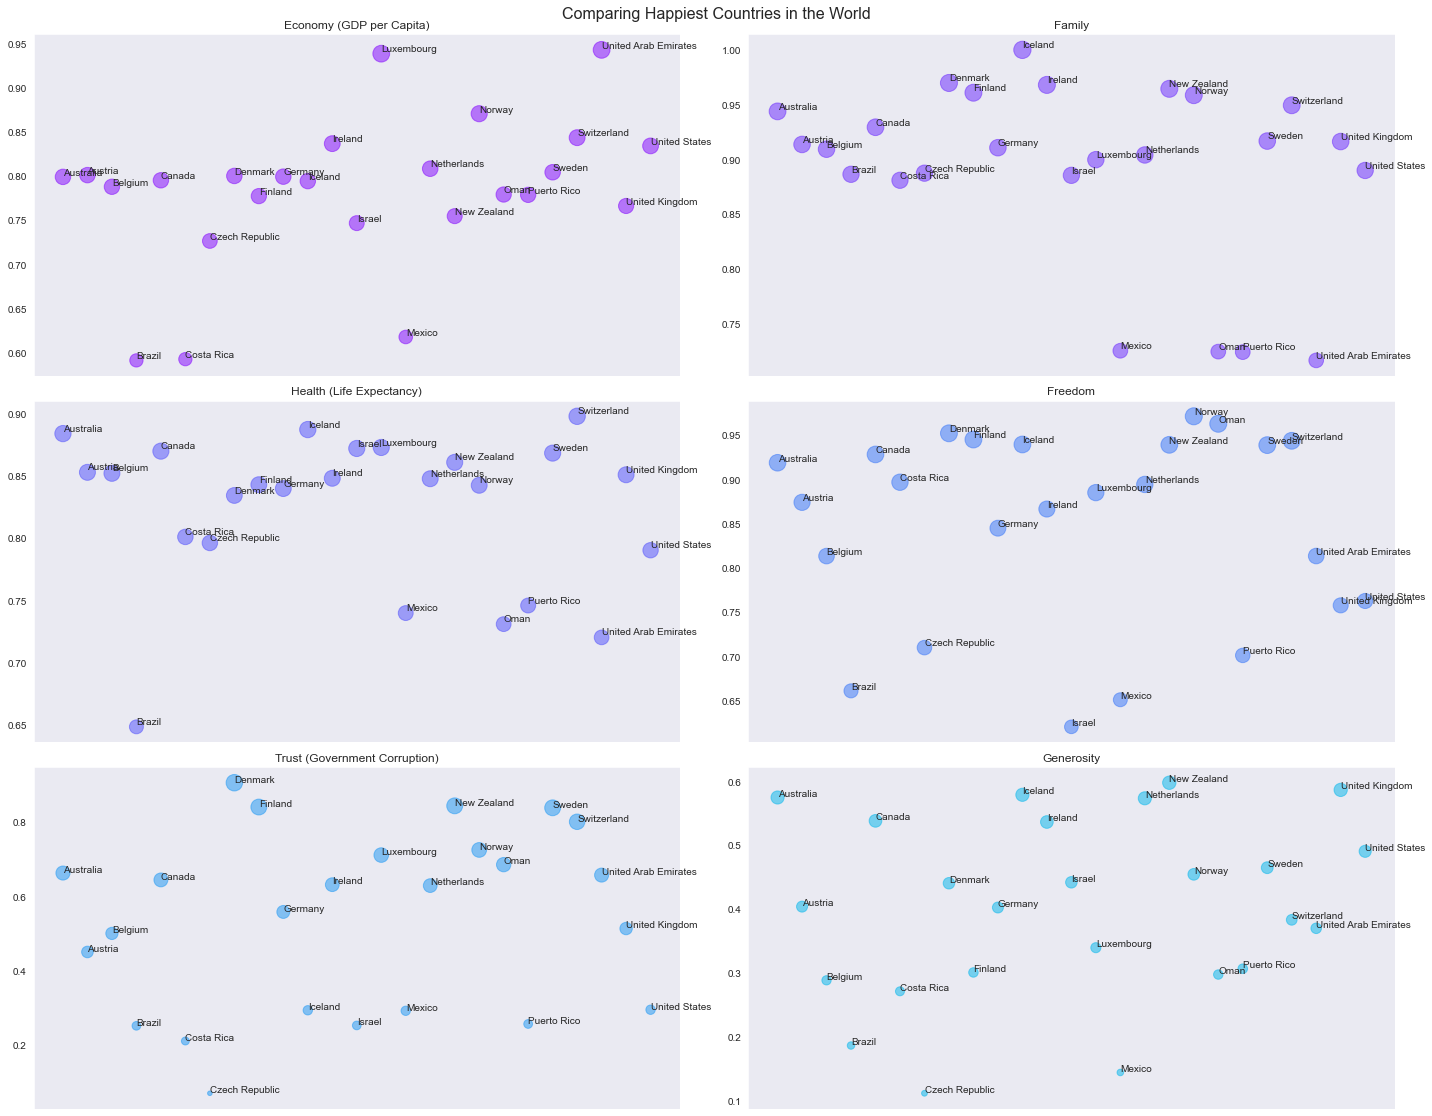

In [10]:
plt.figure(figsize=(20, 16))
fig_num=1
for i, col in enumerate(cols_to_investigate):
    if col != 'Happiness Score':
        plt.subplot(3, 2, fig_num)
        plt.tight_layout()
        plt.scatter(range(len(df_happy_countries_mean)), df_happy_countries_mean[col], s=300 * df_happy_countries_mean[col],
                   color=colors[i], alpha=0.5)
        
        for x, y, country, in zip(range(len(df_happy_countries_mean)), df_happy_countries_mean[col], df_happy_countries_mean['Country']):
            plt.text(x+0.002, y+0.002, country)
        plt.title(col)
        plt.xticks([])
        fig_num += 1
    plt.suptitle("Comparing Happiest Countries in the World", size=16)
    plt.savefig('./plots/Comparing_Happiest_Countries_in_the_World.png', bbox_inches='tight')

Based on the above plots not including the anomalies all the happiest countries have a common trend of high GDP, high life expectancy, high freedom, high trust on the goverment and some aspect of generosity. One of the most important factors seems to be Family with some exceptions to it. Countries like Brazil, Costa Rica and Mexico have very unusual behavior. They have very low GDP, freedom and trust on government compared to other happy countries. But also in the countries like Brazil and Costa Rica family palys are very important role in happiness. In countries like mexico an assumption can be made that people just choose to be happy no matter the circumstances and for some countries like Brazil and Costa Rica family plays a vital role. Thus for some countries happiness is a choice where as for some it comes with freedom, security and family. 

#### Q4. Happy countries in the making

In [11]:
only_objects = df.select_dtypes(include=['object']).copy()
only_objects.head()

,Country,Year
0,Switzerland,2015
1,Iceland,2015
2,Denmark,2015
3,Norway,2015
4,Canada,2015


In [12]:
only_objects["Country"] = only_objects["Country"].astype('category')
only_objects["Year"] = only_objects["Year"].astype('category')
df["Country_code"] = only_objects["Country"].cat.codes
df["Year_code"] = only_objects["Year"].cat.codes

In [13]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Train,Country_code,Year_code
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1,145,0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1,61,0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1,38,0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1,111,0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1,25,0


In [14]:
new_cols_to_investigate = cols_to_investigate + ['Happiness Rank']

In [15]:
df_new_features = df.copy().reset_index(drop=True)

for each_col in new_cols_to_investigate:
    print(each_col)
    df_new_features['Last_Year_' + each_col] = df_new_features.groupby(['Country_code'])[each_col].shift()
    df_new_features['Last_Year_Diff' + each_col] = df_new_features[each_col] - df_new_features['Last_Year_' + each_col]
    df_new_features['Last_Year-1_' + each_col] = df_new_features.groupby(['Country_code'])[each_col].shift(2)
    df_new_features['Last_Year-1_Diff' + each_col] = df_new_features[each_col] - df_new_features['Last_Year-1_' + each_col]
    df_new_features['Last_Year-2_' + each_col] = df_new_features.groupby(['Country_code'])[each_col].shift(3)
    df_new_features['Last_Year-2_Diff' + each_col] = df_new_features[each_col] - df_new_features['Last_Year-2_' + each_col]
    df_new_features['Last_Year-3_' + each_col] = df_new_features.groupby(['Country_code'])[each_col].shift(4)
    df_new_features['Last_Year-3_Diff' + each_col] = df_new_features[each_col] - df_new_features['Last_Year-3_' + each_col]
    df_new_features = df_new_features.fillna(0)
df_new_features.head()

Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Happiness Score
Happiness Rank


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_new_features.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Train', 'Country_code', 'Year_code',
       'Last_Year_Economy (GDP per Capita)',
       'Last_Year_DiffEconomy (GDP per Capita)',
       'Last_Year-1_Economy (GDP per Capita)',
       'Last_Year-1_DiffEconomy (GDP per Capita)',
       'Last_Year-2_Economy (GDP per Capita)',
       'Last_Year-2_DiffEconomy (GDP per Capita)',
       'Last_Year-3_Economy (GDP per Capita)',
       'Last_Year-3_DiffEconomy (GDP per Capita)', 'Last_Year_Family',
       'Last_Year_DiffFamily', 'Last_Year-1_Family', 'Last_Year-1_DiffFamily',
       'Last_Year-2_Family', 'Last_Year-2_DiffFamily', 'Last_Year-3_Family',
       'Last_Year-3_DiffFamily', 'Last_Year_Health (Life Expectancy)',
       'Last_Year_DiffHealth (Life Expectancy)',
       'Last_Year-1_Health (Life Expectancy)',
       'Last_Year-1_Dif

In [17]:
diff_cols = ['Happiness Score', 'Last_Year_Happiness Score', 'Last_Year_DiffHappiness Score', 'Last_Year-1_Happiness Score',
       'Last_Year-1_DiffHappiness Score', 'Last_Year-2_Happiness Score',
       'Last_Year-2_DiffHappiness Score', 'Last_Year-3_Happiness Score',
       'Last_Year-3_DiffHappiness Score']
df_new_features[df_new_features['Country_code'] == 145][diff_cols]

,Happiness Score,Last_Year_Happiness Score,Last_Year_DiffHappiness Score,Last_Year-1_Happiness Score,Last_Year-1_DiffHappiness Score,Last_Year-2_Happiness Score,Last_Year-2_DiffHappiness Score,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score
0,7.587,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159,7.509,7.587,-0.078,0.000,0.000,0.000,0.000,0.000,0.000
318,7.494,7.509,-0.015,7.587,-0.093,0.000,0.000,0.000,0.000
474,7.487,7.494,-0.007,7.509,-0.022,7.587,-0.100,0.000,0.000
631,7.480,7.487,-0.007,7.494,-0.014,7.509,-0.029,7.587,-0.107


In [18]:
latest_df = df_new_features[df_new_features['Year'] == '2019'].copy()
latest_df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank
626,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019,...,7.406,0.363,1.0,0.0,5.0,-4.0,5.0,-4.0,6.0,-5.0
627,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019,...,7.527,0.073,3.0,-1.0,2.0,0.0,1.0,1.0,3.0,-1.0
628,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019,...,7.522,0.032,2.0,1.0,1.0,2.0,4.0,-1.0,4.0,-1.0
629,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019,...,7.561,-0.067,4.0,0.0,3.0,1.0,3.0,1.0,2.0,2.0
630,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019,...,7.378,0.110,6.0,-1.0,6.0,-1.0,7.0,-2.0,7.0,-2.0


In [19]:
diff_happiness_cols = ['Last_Year_DiffHappiness Score', 'Last_Year-1_DiffHappiness Score',
                       'Last_Year-2_DiffHappiness Score', 'Last_Year-3_DiffHappiness Score']
diff_happiness_ranks = ['Last_Year_DiffHappiness Rank', 'Last_Year-1_DiffHappiness Rank',
                       'Last_Year-2_DiffHappiness Rank', 'Last_Year-3_DiffHappiness Rank']
latest_df['accumulated_change_happiness_score'] = latest_df[diff_happiness_cols].mean(axis=1)
latest_df['accumulated_change_happiness_rank'] = latest_df[diff_happiness_ranks].mean(axis=1)

In [20]:
latest_sorted_df = latest_df.sort_values(['accumulated_change_happiness_score','Happiness Rank'], ascending=False)

In [21]:
latest_sorted_df = latest_df.sort_values(['accumulated_change_happiness_rank'], ascending=True)
latest_sorted_df.head(50)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank,accumulated_change_happiness_score,accumulated_change_happiness_rank
727,Benin,102,4.883,0.393,0.437,0.397,0.349,0.082,0.175,2019,...,136.0,-34.0,143.0,-41.0,153.0,-51.0,155.0,-53.0,1.22750,-44.75
684,Honduras,59,5.860,0.642,1.236,0.828,0.507,0.078,0.246,2019,...,72.0,-13.0,91.0,-32.0,104.0,-45.0,105.0,-46.0,0.77400,-34.00
724,Ivory Coast,99,4.944,0.569,0.808,0.232,0.352,0.090,0.154,2019,...,107.0,-8.0,128.0,-29.0,139.0,-40.0,151.0,-52.0,0.83850,-32.25
743,Guinea,118,4.534,0.380,0.829,0.375,0.332,0.086,0.207,2019,...,140.0,-22.0,149.0,-31.0,151.0,-33.0,150.0,-32.0,0.85050,-29.50
671,Kosovo,46,6.100,0.882,1.232,0.758,0.489,0.006,0.262,2019,...,66.0,-20.0,78.0,-32.0,77.0,-31.0,69.0,-23.0,0.61725,-26.50
739,Niger,114,4.628,0.138,0.774,0.366,0.318,0.102,0.188,2019,...,134.0,-20.0,135.0,-21.0,142.0,-28.0,144.0,-30.0,0.65425,-24.75
734,Cambodia,109,4.700,0.574,1.122,0.637,0.609,0.062,0.232,2019,...,120.0,-11.0,129.0,-20.0,140.0,-31.0,145.0,-36.0,0.61825,-24.50
699,Tajikistan,74,5.467,0.493,1.098,0.718,0.389,0.144,0.230,2019,...,88.0,-14.0,96.0,-22.0,100.0,-26.0,106.0,-32.0,0.46150,-23.50
740,Burkina Faso,115,4.587,0.331,1.056,0.380,0.255,0.113,0.177,2019,...,121.0,-6.0,134.0,-19.0,145.0,-30.0,152.0,-37.0,0.64150,-23.00
728,Congo (Brazzaville),103,4.812,0.673,0.799,0.508,0.372,0.093,0.105,2019,...,114.0,-11.0,124.0,-21.0,127.0,-24.0,139.0,-36.0,0.54325,-23.00


In [22]:
### Top 10 happiest countries in the making
happy_countries_in_making = latest_sorted_df.head(10).sort_values(['Happiness Rank'], ascending=True)['Country'].values
print("Happy countries in making: ", happy_countries_in_making)

Happy countries in making:  ['Kosovo' 'Honduras' 'Tajikistan' 'Ivory Coast' 'Benin'
 'Congo (Brazzaville)' 'Cambodia' 'Niger' 'Burkina Faso' 'Guinea']


In [23]:
latest_sorted_df.head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank,accumulated_change_happiness_score,accumulated_change_happiness_rank
727,Benin,102,4.883,0.393,0.437,0.397,0.349,0.082,0.175,2019,...,136.0,-34.0,143.0,-41.0,153.0,-51.0,155.0,-53.0,1.22750,-44.75
684,Honduras,59,5.860,0.642,1.236,0.828,0.507,0.078,0.246,2019,...,72.0,-13.0,91.0,-32.0,104.0,-45.0,105.0,-46.0,0.77400,-34.00
724,Ivory Coast,99,4.944,0.569,0.808,0.232,0.352,0.090,0.154,2019,...,107.0,-8.0,128.0,-29.0,139.0,-40.0,151.0,-52.0,0.83850,-32.25
743,Guinea,118,4.534,0.380,0.829,0.375,0.332,0.086,0.207,2019,...,140.0,-22.0,149.0,-31.0,151.0,-33.0,150.0,-32.0,0.85050,-29.50
671,Kosovo,46,6.100,0.882,1.232,0.758,0.489,0.006,0.262,2019,...,66.0,-20.0,78.0,-32.0,77.0,-31.0,69.0,-23.0,0.61725,-26.50
739,Niger,114,4.628,0.138,0.774,0.366,0.318,0.102,0.188,2019,...,134.0,-20.0,135.0,-21.0,142.0,-28.0,144.0,-30.0,0.65425,-24.75
734,Cambodia,109,4.700,0.574,1.122,0.637,0.609,0.062,0.232,2019,...,120.0,-11.0,129.0,-20.0,140.0,-31.0,145.0,-36.0,0.61825,-24.50
699,Tajikistan,74,5.467,0.493,1.098,0.718,0.389,0.144,0.230,2019,...,88.0,-14.0,96.0,-22.0,100.0,-26.0,106.0,-32.0,0.46150,-23.50
740,Burkina Faso,115,4.587,0.331,1.056,0.380,0.255,0.113,0.177,2019,...,121.0,-6.0,134.0,-19.0,145.0,-30.0,152.0,-37.0,0.64150,-23.00
728,Congo (Brazzaville),103,4.812,0.673,0.799,0.508,0.372,0.093,0.105,2019,...,114.0,-11.0,124.0,-21.0,127.0,-24.0,139.0,-36.0,0.54325,-23.00


In [24]:
latest_df.dropna(inplace=True)

In [25]:
all_countries = latest_df['Country']
all_countries

626                     Finland
627                     Denmark
628                      Norway
629                     Iceland
630                 Netherlands
                 ...           
777                      Rwanda
778                    Tanzania
779                 Afghanistan
780    Central African Republic
781                 South Sudan
Name: Country, Length: 156, dtype: object

In [26]:
ll = latest_df['accumulated_change_happiness_score'].min()
hl = latest_df['accumulated_change_happiness_score'].max()
latest_df['norm_change_happiness_score'] = (latest_df['accumulated_change_happiness_score'] - ll) / (hl - ll)
colors = cm.rainbow(np.arange(0, 1+0.05, 0.05))
custom_bins = np.arange(0, 1+0.05, 0.05)
custom_bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

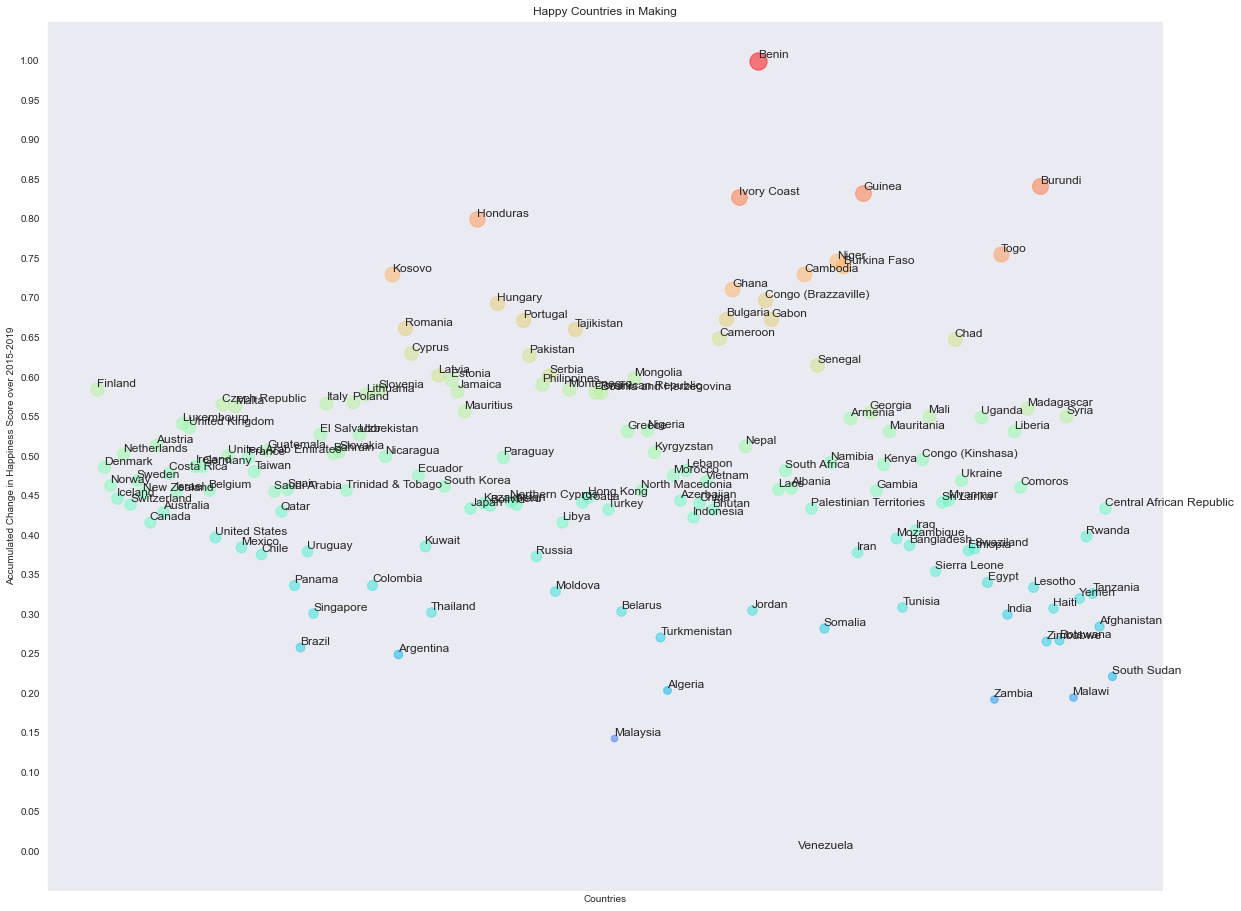

In [25]:
plt.figure(figsize=(20, 16))
for i in range(0, len(all_countries)):
    obj = latest_df.iloc[i]
    score, country = obj['norm_change_happiness_score'], obj['Country']
    color_index = np.argwhere(score <= custom_bins)[0][0]
    plt.scatter(i, score, s=300*score, color=colors[color_index], alpha=0.5)
    plt.text(i+.003, score+.003, country, fontsize=12)
plt.yticks(np.arange(0, 1+0.05, 0.05))
plt.xticks([])
plt.xlabel('Countries')
plt.ylabel('Accumulated Change in Happiness Score over 2015-2019')
plt.title('Happy Countries in Making')
plt.savefig('./plots/Happy_Countries_in_Making.png', bbox_inches='tight')

In [27]:
latest_df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Train', 'Country_code', 'Year_code',
       'Last_Year_Economy (GDP per Capita)',
       'Last_Year_DiffEconomy (GDP per Capita)',
       'Last_Year-1_Economy (GDP per Capita)',
       'Last_Year-1_DiffEconomy (GDP per Capita)',
       'Last_Year-2_Economy (GDP per Capita)',
       'Last_Year-2_DiffEconomy (GDP per Capita)',
       'Last_Year-3_Economy (GDP per Capita)',
       'Last_Year-3_DiffEconomy (GDP per Capita)', 'Last_Year_Family',
       'Last_Year_DiffFamily', 'Last_Year-1_Family', 'Last_Year-1_DiffFamily',
       'Last_Year-2_Family', 'Last_Year-2_DiffFamily', 'Last_Year-3_Family',
       'Last_Year-3_DiffFamily', 'Last_Year_Health (Life Expectancy)',
       'Last_Year_DiffHealth (Life Expectancy)',
       'Last_Year-1_Health (Life Expectancy)',
       'Last_Year-1_Dif

In [28]:
for each_col in cols_to_investigate:
    diff_cols = [col+each_col for col in ['Last_Year_Diff', 'Last_Year-1_Diff',
                       'Last_Year-2_Diff', 'Last_Year-3_Diff']]
    latest_df['accumulated_change_'+each_col] = latest_df[diff_cols].mean(axis=1)

for each_col in cols_to_investigate:
    ll = latest_df['accumulated_change_'+each_col].min()
    hl = latest_df['accumulated_change_'+each_col].max()
    latest_df['norm_change_'+each_col] = (latest_df['accumulated_change_'+each_col] - ll) / (hl - ll)

In [29]:
latest_df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Train', 'Country_code', 'Year_code',
       'Last_Year_Economy (GDP per Capita)',
       'Last_Year_DiffEconomy (GDP per Capita)',
       'Last_Year-1_Economy (GDP per Capita)',
       'Last_Year-1_DiffEconomy (GDP per Capita)',
       'Last_Year-2_Economy (GDP per Capita)',
       'Last_Year-2_DiffEconomy (GDP per Capita)',
       'Last_Year-3_Economy (GDP per Capita)',
       'Last_Year-3_DiffEconomy (GDP per Capita)', 'Last_Year_Family',
       'Last_Year_DiffFamily', 'Last_Year-1_Family', 'Last_Year-1_DiffFamily',
       'Last_Year-2_Family', 'Last_Year-2_DiffFamily', 'Last_Year-3_Family',
       'Last_Year-3_DiffFamily', 'Last_Year_Health (Life Expectancy)',
       'Last_Year_DiffHealth (Life Expectancy)',
       'Last_Year-1_Health (Life Expectancy)',
       'Last_Year-1_Dif

In [30]:
df_happy_countries_in_making = latest_df[latest_df['norm_change_Happiness Score'] >= 0.7].reset_index(drop=True)
df_happy_countries_in_making

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,accumulated_change_Trust (Government Corruption),accumulated_change_Generosity,accumulated_change_Happiness Score,norm_change_Economy (GDP per Capita),norm_change_Family,norm_change_Health (Life Expectancy),norm_change_Freedom,norm_change_Trust (Government Corruption),norm_change_Generosity,norm_change_Happiness Score
0,Kosovo,46,6.100,0.882,1.232,0.758,0.489,0.006,0.262,2019,...,-0.042338,-0.027238,0.61725,0.470333,0.768951,0.842432,1.000000,0.592038,0.648304,0.729739
1,Honduras,59,5.860,0.642,1.236,0.828,0.507,0.078,0.246,2019,...,0.006836,0.029035,0.77400,0.428891,0.663667,0.895994,0.789490,0.742198,0.863311,0.799159
2,Ghana,98,4.996,0.611,0.868,0.486,0.381,0.040,0.245,2019,...,0.007378,0.017044,0.57450,0.465557,0.477870,0.763876,0.247906,0.743854,0.817495,0.710806
3,Ivory Coast,99,4.944,0.569,0.808,0.232,0.352,0.090,0.154,2019,...,-0.051895,-0.034067,0.83850,0.512774,0.258388,0.757442,0.143596,0.562853,0.622212,0.827724
4,Benin,102,4.883,0.393,0.437,0.397,0.349,0.082,0.175,2019,...,0.013290,-0.013837,1.22750,0.498955,0.453565,0.761089,0.164389,0.761907,0.699505,1.000000
5,Cambodia,109,4.700,0.574,1.122,0.637,0.609,0.062,0.232,2019,...,-0.009624,-0.130226,0.61825,0.520661,0.842652,0.771182,0.307953,0.691935,0.254810,0.730182
6,Niger,114,4.628,0.138,0.774,0.366,0.318,0.102,0.188,2019,...,-0.039431,-0.013811,0.65425,0.487861,0.127893,0.642708,0.173341,0.600916,0.699605,0.746125
7,Burkina Faso,115,4.587,0.331,1.056,0.380,0.255,0.113,0.177,2019,...,-0.012495,-0.044716,0.64150,0.499150,0.515428,0.734849,0.169185,0.683169,0.581523,0.740478
8,Guinea,118,4.534,0.380,0.829,0.375,0.332,0.086,0.207,2019,...,-0.025382,-0.051881,0.85050,0.705258,0.700941,0.796563,0.337685,0.643816,0.554147,0.833038
9,Togo,139,4.085,0.275,0.572,0.410,0.293,0.085,0.177,2019,...,-0.019961,0.002781,0.67600,0.482688,0.849569,0.760269,0.163142,0.660369,0.762999,0.755757


In [31]:
df_happy_countries_in_making.Country.values

array(['Kosovo', 'Honduras', 'Ghana', 'Ivory Coast', 'Benin', 'Cambodia',
       'Niger', 'Burkina Faso', 'Guinea', 'Togo', 'Burundi'], dtype=object)

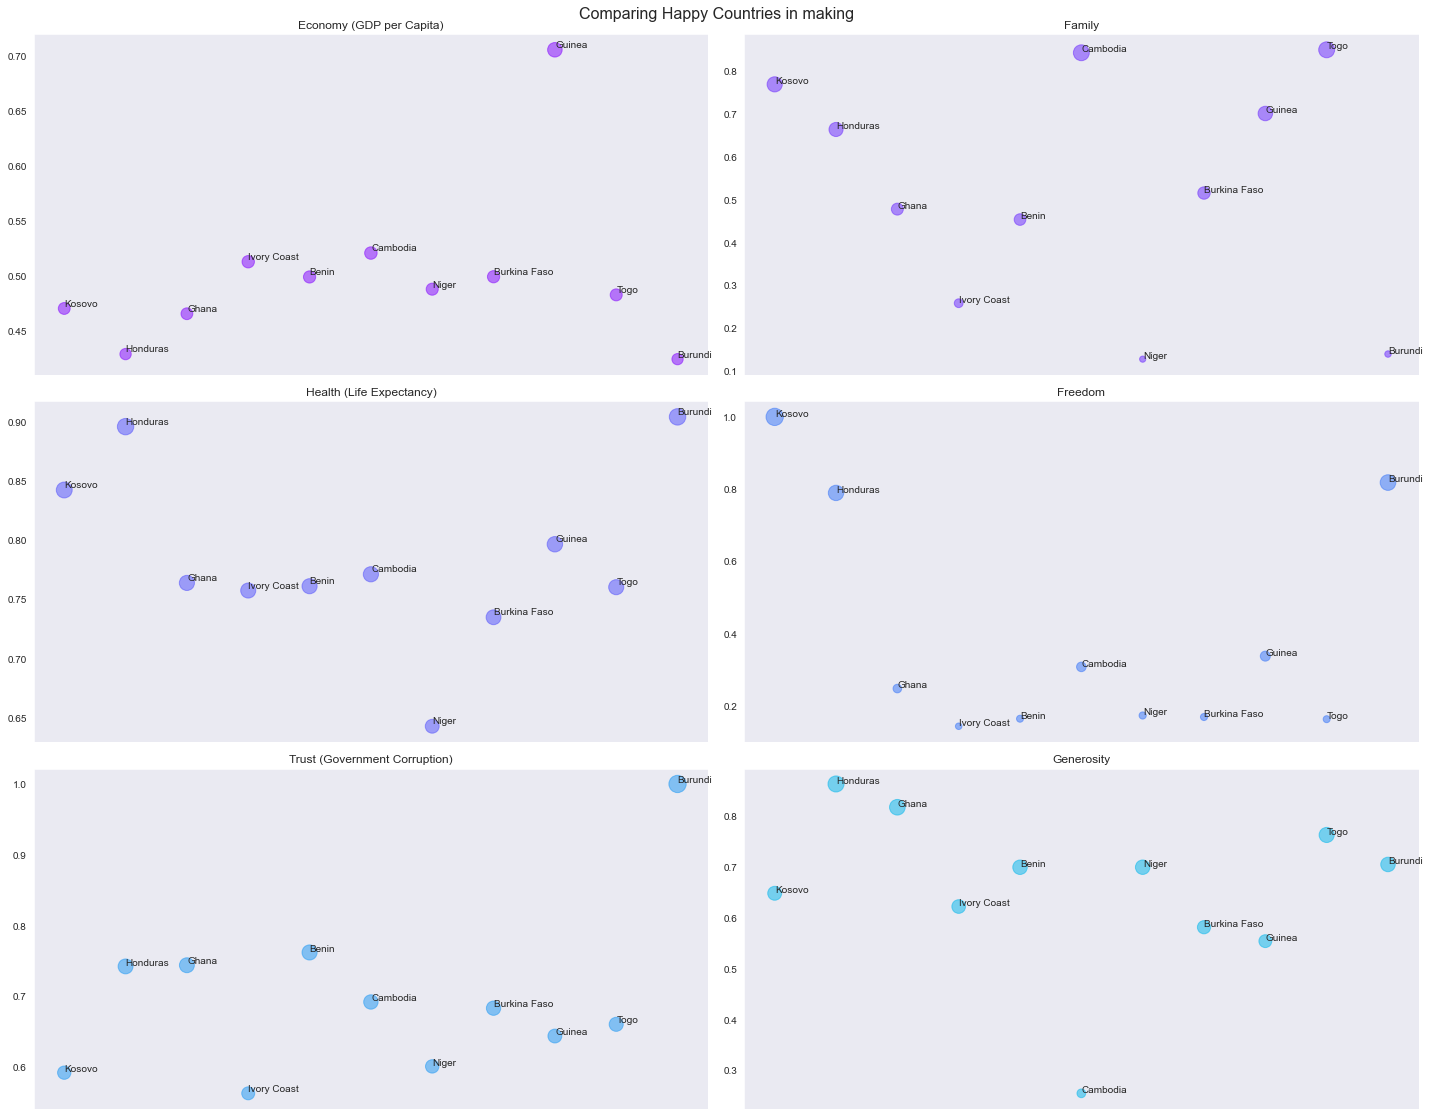

In [140]:
plt.figure(figsize=(20, 16))
fig_num=1
for i, col in enumerate(cols_to_investigate):
    if col != 'Happiness Score':
        plt.subplot(3, 2, fig_num)
        plt.tight_layout()
        plt.scatter(range(len(df_happy_countries_in_making)), df_happy_countries_in_making['norm_change_'+col], s=300 * df_happy_countries_in_making['norm_change_'+col],
                   color=colors[i], alpha=0.5)
        
        for x, y, country, in zip(range(len(df_happy_countries_in_making)), df_happy_countries_in_making['norm_change_'+col], df_happy_countries_in_making['Country']):
            plt.text(x+0.002, y+0.002, country)
        plt.title(col)
        plt.xticks([])
        fig_num += 1
    plt.suptitle("Comparing Happy Countries in making", size=16)
    plt.savefig('./plots/Comparing_Happy_Countries_in_making.png', bbox_inches='tight')

###### Analysis on Happy Countries in the making

Top 10 happy countries in the making arearray(['Kosovo', 'Honduras', 'Ghana', 'Ivory Coast', 'Benin', 'Cambodia',
       'Niger', 'Burkina Faso', 'Guinea', 'Togo', 'Burundi'], based on the trend. But this list doesn't also give the complete picture since there are already countries on the top and these countries were in the bottom of the list and the scope of improvement in these countries is also quite high. Also, one of the other common observations was that the scope for improvement saturates after reaching certain threshold and this could be seen in the countries which are already happy like ['Australia' 'Austria' 'Belgium' 'Canada'
 'Czech Republic' 'Denmark' 'Finland' 'Germany' 'Iceland' 'Ireland'
 'Israel' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Oman' 'Puerto Rico' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States'].

Another trend which could be seen happy countries in making is that Family and life expectancy play a very important role. Thus at this point we can safely hypothesize that family and life expectancy plays a very important role in happiness.

#### Q5 Predicting happiness

In [32]:
print(df_new_features.shape)
print(df_new_features.columns)

(782, 77)
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Train', 'Country_code', 'Year_code',
       'Last_Year_Economy (GDP per Capita)',
       'Last_Year_DiffEconomy (GDP per Capita)',
       'Last_Year-1_Economy (GDP per Capita)',
       'Last_Year-1_DiffEconomy (GDP per Capita)',
       'Last_Year-2_Economy (GDP per Capita)',
       'Last_Year-2_DiffEconomy (GDP per Capita)',
       'Last_Year-3_Economy (GDP per Capita)',
       'Last_Year-3_DiffEconomy (GDP per Capita)', 'Last_Year_Family',
       'Last_Year_DiffFamily', 'Last_Year-1_Family', 'Last_Year-1_DiffFamily',
       'Last_Year-2_Family', 'Last_Year-2_DiffFamily', 'Last_Year-3_Family',
       'Last_Year-3_DiffFamily', 'Last_Year_Health (Life Expectancy)',
       'Last_Year_DiffHealth (Life Expectancy)',
       'Last_Year-1_Health (Life Expectancy)',
       'Last_

In [33]:
for each_col in cols_to_investigate:
    diff_cols = [col+each_col for col in ['Last_Year_Diff', 'Last_Year-1_Diff',
                       'Last_Year-2_Diff', 'Last_Year-3_Diff', 'Last_Year_', 'Last_Year-1_', 'Last_Year-2_', 'Last_Year-3_']]
    for col in diff_cols:
        df_new_features[col].fillna(0, inplace=True)

In [34]:
df_new_features

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019,...,3.465,-0.131,151.0,1.0,151.0,1.0,152.0,0.0,154.0,-2.0
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019,...,3.781,-0.550,153.0,0.0,153.0,0.0,149.0,4.0,146.0,7.0
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019,...,3.575,-0.372,145.0,9.0,141.0,13.0,154.0,0.0,153.0,1.0
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019,...,0.000,0.000,155.0,0.0,155.0,0.0,148.0,7.0,0.0,0.0


In [35]:
df_new_features.head(5)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x_cols = [
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity','Country_code', 'Year_code',
       'Last_Year_Economy (GDP per Capita)',
       'Last_Year_DiffEconomy (GDP per Capita)',
       'Last_Year-1_Economy (GDP per Capita)',
       'Last_Year-1_DiffEconomy (GDP per Capita)',
       'Last_Year-2_Economy (GDP per Capita)',
       'Last_Year-2_DiffEconomy (GDP per Capita)',
       'Last_Year-3_Economy (GDP per Capita)',
       'Last_Year-3_DiffEconomy (GDP per Capita)', 'Last_Year_Family',
       'Last_Year_DiffFamily', 'Last_Year-1_Family', 'Last_Year-1_DiffFamily',
       'Last_Year-2_Family', 'Last_Year-2_DiffFamily', 'Last_Year-3_Family',
       'Last_Year-3_DiffFamily', 'Last_Year_Health (Life Expectancy)',
       'Last_Year_DiffHealth (Life Expectancy)',
       'Last_Year-1_Health (Life Expectancy)',
       'Last_Year-1_DiffHealth (Life Expectancy)',
       'Last_Year-2_Health (Life Expectancy)',
       'Last_Year-2_DiffHealth (Life Expectancy)',
       'Last_Year-3_Health (Life Expectancy)',
       'Last_Year-3_DiffHealth (Life Expectancy)', 'Last_Year_Freedom',
       'Last_Year_DiffFreedom', 'Last_Year-1_Freedom',
       'Last_Year-1_DiffFreedom', 'Last_Year-2_Freedom',
       'Last_Year-2_DiffFreedom', 'Last_Year-3_Freedom',
       'Last_Year-3_DiffFreedom', 'Last_Year_Trust (Government Corruption)',
       'Last_Year_DiffTrust (Government Corruption)',
       'Last_Year-1_Trust (Government Corruption)',
       'Last_Year-1_DiffTrust (Government Corruption)',
       'Last_Year-2_Trust (Government Corruption)',
       'Last_Year-2_DiffTrust (Government Corruption)',
       'Last_Year-3_Trust (Government Corruption)',
       'Last_Year-3_DiffTrust (Government Corruption)', 'Last_Year_Generosity',
       'Last_Year_DiffGenerosity', 'Last_Year-1_Generosity',
       'Last_Year-1_DiffGenerosity', 'Last_Year-2_Generosity',
       'Last_Year-2_DiffGenerosity', 'Last_Year-3_Generosity',
       'Last_Year-3_DiffGenerosity']

y_cols = ['Happiness Score']

In [37]:
for col in x_cols:
    df_new_features[col].fillna(0, inplace=True)

In [38]:
df_predict = df_new_features.copy()
df_predict = df_predict.reset_index(drop=True)
df_predict.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,...,Last_Year-3_Happiness Score,Last_Year-3_DiffHappiness Score,Last_Year_Happiness Rank,Last_Year_DiffHappiness Rank,Last_Year-1_Happiness Rank,Last_Year-1_DiffHappiness Rank,Last_Year-2_Happiness Rank,Last_Year-2_DiffHappiness Rank,Last_Year-3_Happiness Rank,Last_Year-3_DiffHappiness Rank
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_predict.shape

(782, 77)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [41]:
#Split into explanatory and response variables
X = df_predict[x_cols]
y = df_predict[y_cols]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=30) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.6373004834946869 on 79 values.'

In [60]:
### Exploring feature importance

importance = lm_model.coef_
importance = importance.squeeze()
features_importance = {x_cols[i] : v for i, v in enumerate(importance)}

In [61]:
features_importance = dict(sorted(features_importance.items(), key=lambda item: item[1], reverse=True))

In [62]:
top_features = list(features_importance.keys())[:5]

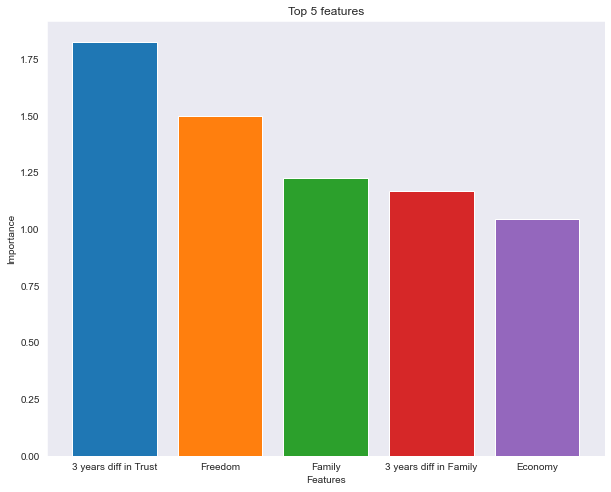

In [63]:
plt.figure(figsize=(10, 8))
for i, each_feature in enumerate(top_features):
    plt.bar(i, features_importance[each_feature])

top_features[0] = '3 years diff in Trust'
top_features[3] = '3 years diff in Family'
top_features[-1] = 'Economy'
plt.xticks(list(range(5)), top_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features')
plt.savefig('./plots/Top_5.png', bbox_inches='tight')